## 키와 몸무게의 지표 확인(data split 없이 진행)

In [5]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd
df = pd.read_csv('키와몸무게.csv',encoding='cp949')

In [44]:
# pandas를 통해 데이터를 확인합니다.

# 파운드로 적혀 있는 무게 값을 KG 단위로 변환합니다.
# 1 파운드 = 0.45359237kg
몸무게 = df["Weight"] * 0.45359237
# inch로 적혀 있는 키 값을 cm 단위로 변환합니다.
# 1 inch = 2.54cm
키 = df["Height"] * 2.54

print(키.shape)
print(키.to_numpy())
print(몸무게.shape)
print(몸무게.to_numpy())

(10000,)
[187.57142322 174.70603628 188.2396677  ... 162.22470022 175.34697755
 157.33838453]
(10000,)
[109.72107461  73.62279191  96.49762887 ...  58.27542433  74.32222627
  51.55036583]


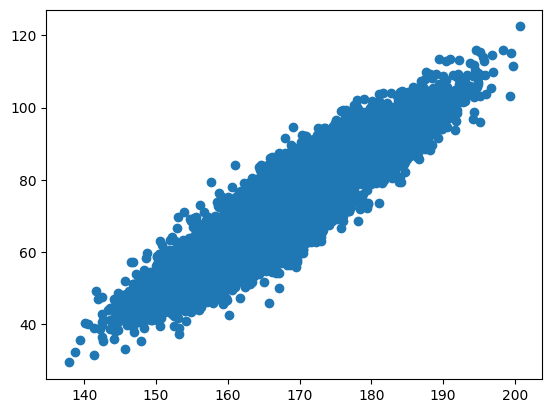

In [36]:
# 키와 몸무게에 관한 산점도를 그렵봅니다.
# 산점도가 직선의 방향성을 지니고 있을 때, 선형회귀를 사용합니다.
import matplotlib.pyplot as plt

키 = df["Height"] * 2.54
몸무게 = df["Weight"] * 0.45359237
plt.plot(키, 몸무게, 'o')
plt.show()


In [48]:
# 선형회귀 모델을 통한 학습을 진행합니다.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(키.values.reshape(-1,1), 몸무게)

LinearRegression()

In [49]:
# 학습한 내용을 바탕으로 예측합니다.
lr.predict([[170]])

array([75.19390579])

In [51]:
# 회귀식의 기울기와 절편을 구합니다
# 기울기 : coef_,  절편 : intercept_
print('기울기:', lr.coef_, '절편:', lr.intercept_)

기울기: [1.37815071] 절편: -159.09171408121202


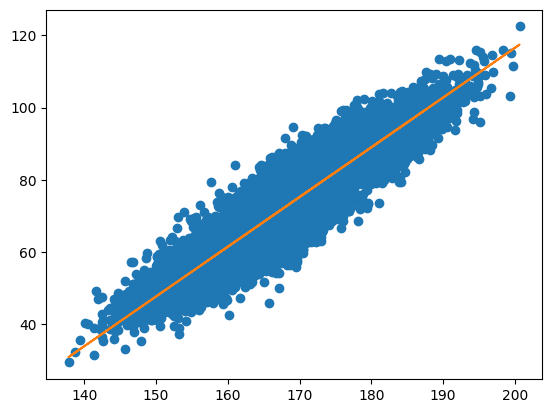

In [50]:
# 예측값 그래프 그리기
plt.plot(키, 몸무게, 'o')
plt.plot(키,lr.predict(키.values.reshape(-1,1)))
plt.show()

## data split을 통한 모델 검증

In [16]:
#case 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# train, test 분리를 위해 numpy배열로 변환
data = df['Height'].to_numpy()
target = df['Weight'].to_numpy()


# train, test 분리
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(data, target, test_size = 0.2, random_state = 40)
# 행(row)으로 나열된 데이터를 열(column) 단위로 변경
훈련용_data = 훈련용_data.reshape(-1,1)
테스트용_data = 테스트용_data.reshape(-1,1)

In [18]:
# 선형회귀모델 학습
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(훈련용_data, 훈련용_target)
# [170] 데이터 넣어서 예측값 확인하기
lr.predict([[170]])

array([962.56637468])

In [19]:
# score 확인
lr.score(테스트용_data, 테스트용_target)

0.8501385418470461

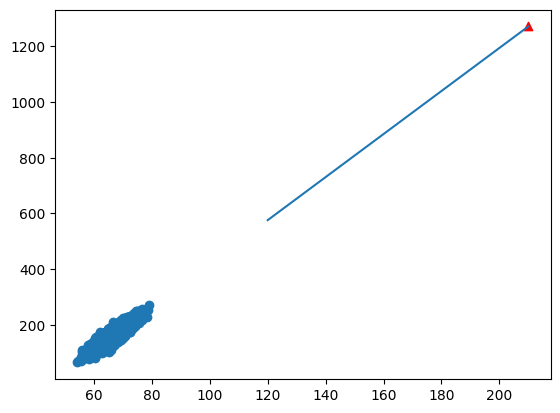

In [20]:
# 예측 그래프 그리기
import matplotlib.pyplot as plt
plt.scatter(훈련용_data , 훈련용_target)
plt.plot( [120,210], [120*lr.coef_ +lr.intercept_ ,
                    210*lr.coef_ + lr.intercept_])
plt.scatter(210 , 210*lr.coef_ + lr.intercept_ ,marker="^",color="red")
plt.show()